<h1 style="color:dodgerblue"> 
ISEF 2024-25 Project
</h1>

<h3 style="color:white"> 
Assessing Effect of Change in Computational Complexity (Space and Time Variables) on Accuracy And Efficiency Of CSS Codes, Applied on Bell States
</h3>

##### <span style="color: white;"> By: Sumer Chaudhary, 9th Grade, BASIS Independent McLean
###### <span style="color: white;"> sumerchaudhary1@gmail.com

______________________
<h6 style="color:dodgerblue"> 
12/17/2024 - 01/26/2025
</h6>

## <span style="color: white;">Imports and Setup

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, generate_preset_pass_manager, transpile
from qiskit.visualization import plot_histogram, plot_circuit_layout
from qiskit.quantum_info import Statevector, Operator
from qiskit.quantum_info.operators import SparsePauliOp
from qiskit.circuit import IfElseOp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, SamplerV2
from control import create_bell_state, create_teleportation
from shor import create_shor_bell_state, create_shor_teleportation
from steane import create_steane_bell_state, create_steane_teleportation
from fqc import create_fqc_bell_state, create_fqc_teleportation

service=QiskitRuntimeService(channel="ibm_quantum", token="3e212c75c103910c0dd8eaafc1783985ceb46ad084319d375e65f312ce50d11fd9ca71e3ca4e84abed23966f002dfa212fd42ae1acf5415be7590154308700c3")

In [2]:
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel

qBackend = service.least_busy(simulator=False)

noise_model = NoiseModel.from_backend(qBackend)
simBackend = AerSimulator(noise_model=noise_model, method="matrix_product_state")

## <span style="color: white;">Creating Circuits

### <span style="color: white;"> Control Group

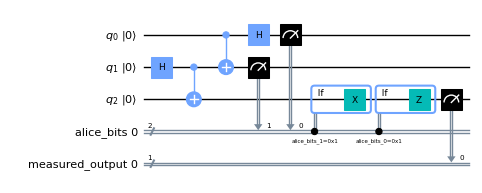

In [3]:
control_qc_bell = create_bell_state()
control_qc_tele = create_teleportation()

control_qc_bell.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=False, filename="Diagrams/control_bell.png")
control_qc_tele.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=False, filename="Diagrams/control_tele.png")

### <span style="color: white;"> Shor's Error Correction Code

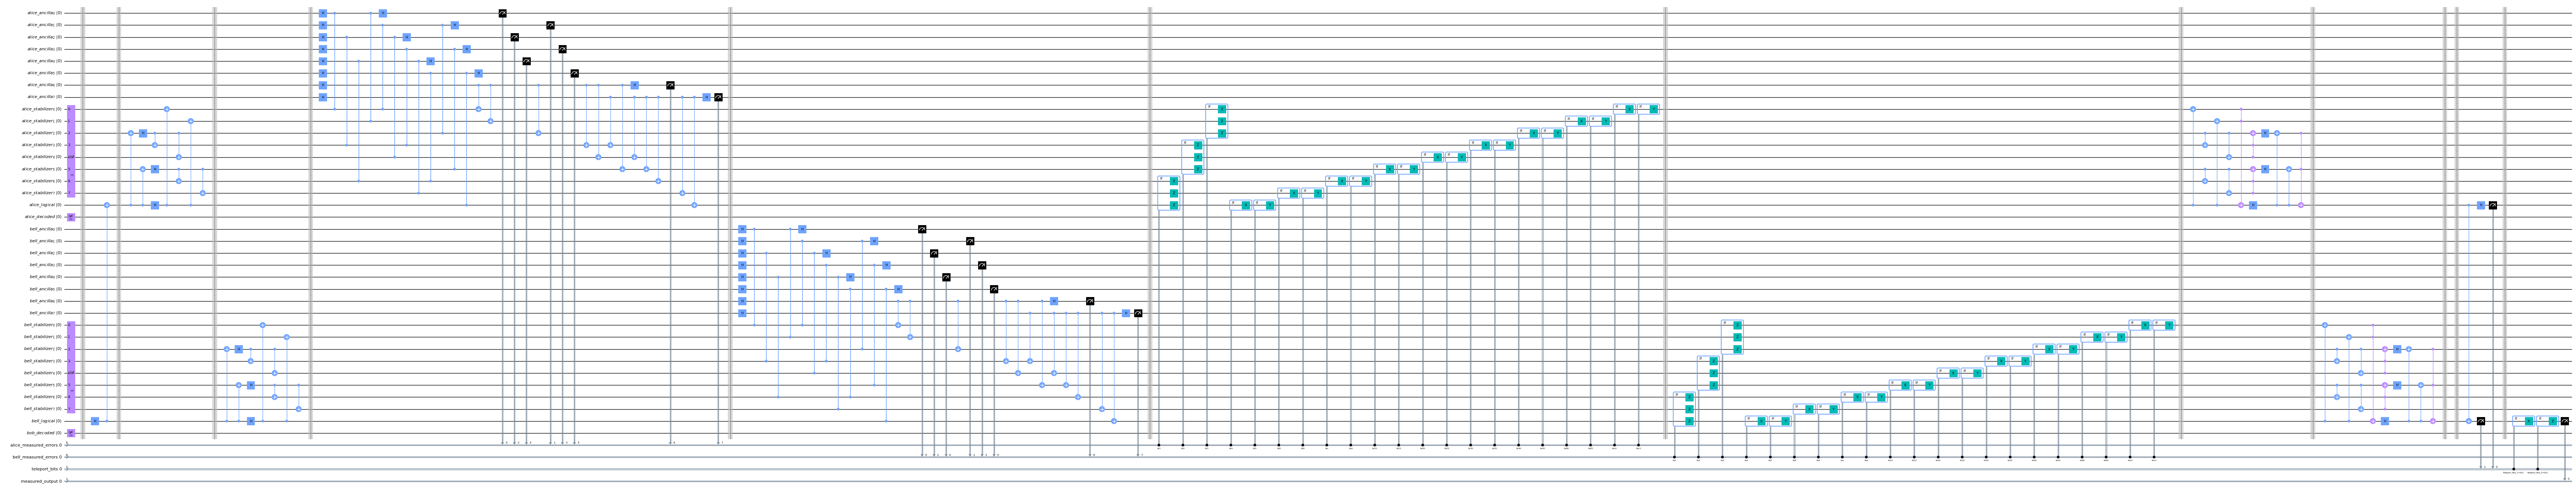

In [4]:
shor_qc_bell = create_shor_bell_state()
shor_qc_tele = create_shor_teleportation()

shor_qc_bell.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=True, filename="Diagrams/shor_bell.png")
shor_qc_tele.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=True, filename="Diagrams/shor_tele.png")

### <span style="color: white;"> Steane Error Correction Code

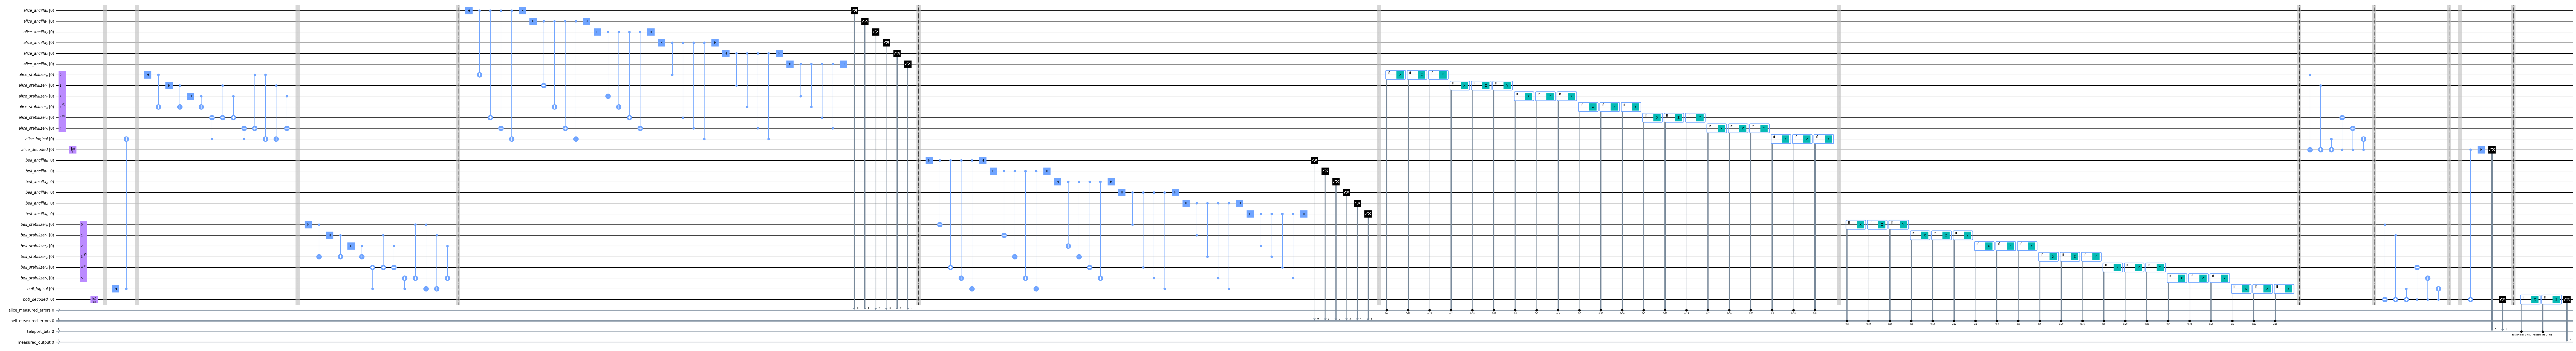

In [5]:
steane_qc_bell = create_steane_bell_state()
steane_qc_tele = create_steane_teleportation()

steane_qc_bell.draw("mpl", style="clifford", scale=0.75, fold=-1, plot_barriers=True, initial_state=True, justify="none", filename="Diagrams/steane_bell.png")
steane_qc_tele.draw("mpl", style="clifford", scale=0.75, fold=-1, plot_barriers=True, initial_state=True, justify="none", filename="Diagrams/steane_tele.png")

### <span style="color: white;"> Five Qubit Error Correction Code

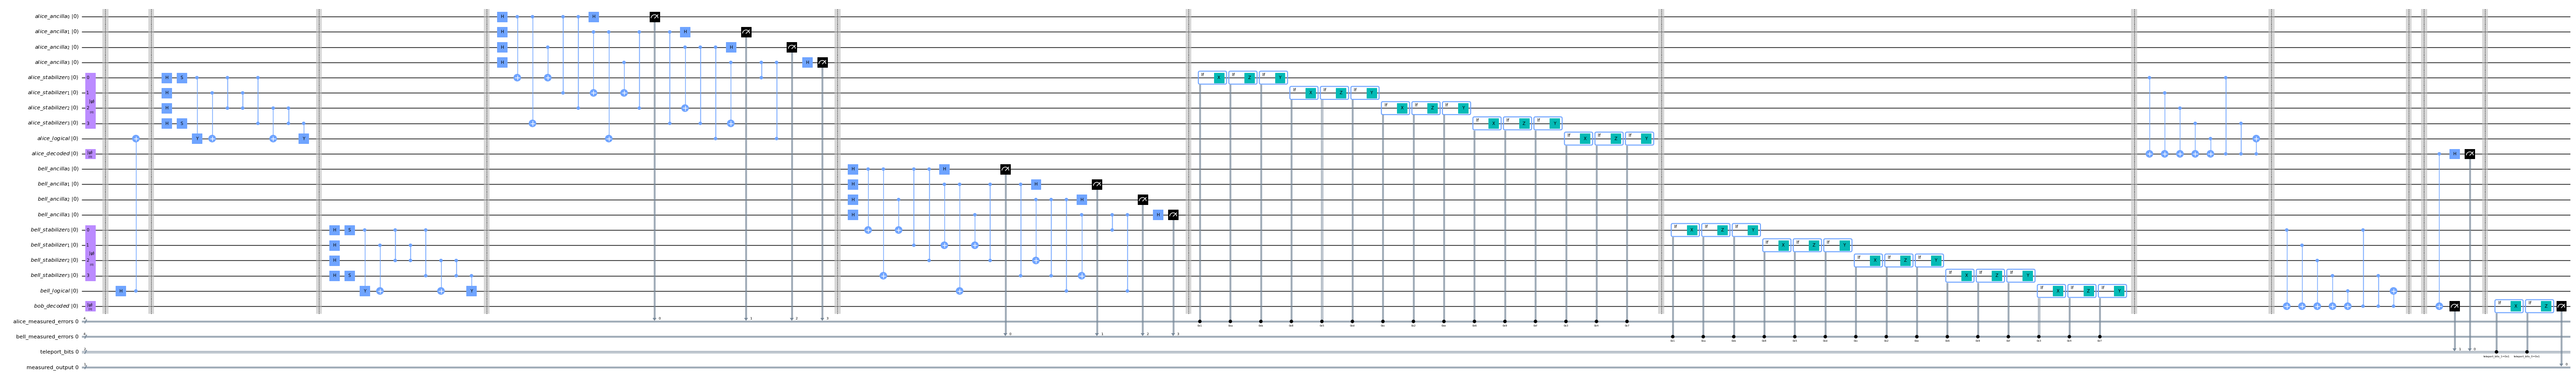

In [6]:
fqc_qc_bell = create_fqc_bell_state()
fqc_qc_tele = create_fqc_teleportation()

fqc_qc_bell.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=True, filename="Diagrams/fcq_bell.png")
fqc_qc_tele.draw("mpl", initial_state=True, scale=0.5, fold=-1, style="clifford", reverse_bits=False, plot_barriers=True, filename="Diagrams/fcq_tele.png")

## <span style="color: white;">    Running experiments

### <span style="color: white;">Simulator

In [7]:
# Convert to an ISA circuit and layout-mapped observables.
circuits = [control_qc_bell, control_qc_tele, shor_qc_bell, shor_qc_tele, steane_qc_bell, steane_qc_tele, fqc_qc_bell, fqc_qc_tele]
pm = generate_preset_pass_manager(backend=simBackend, optimization_level=3)
isa_circuits = [pm.run(circuit) for circuit in circuits]

In [8]:
#Run the ISA circuits
numShots = 250
jobs = [simBackend.run(circuit, shots=numShots) for circuit in isa_circuits]

In [61]:
results = {}
time = []
names = []
for job in jobs:
    proc_results = {'0': 0, '1': 0}
    if circuits[jobs.index(job)].name[0] == "B":
        proc_results = {'00': 0, '01': 0, '10': 0, '11': 0}
    
    proc_time = {circuits[jobs.index(job)].name: job.result().time_taken}
    for res in job.result().get_counts(0):
        if circuits[jobs.index(job)].name[0] == "B":
            proc_results[res[:2]] += job.result().get_counts(0)[res]
        else:
            proc_results[res[0]] += job.result().get_counts(0)[res]
    results[circuits[jobs.index(job)].name] = proc_results
    time.append(proc_time)
    names.append(circuits[jobs.index(job)].name)

print(results, "\n", time, "\n", names)

{} 
 [] 
 ['Bell State Unencoded', 'Teleportation Unencoded', "Bell State Encoded with Shor's Code", "Quantum Teleportation Encoded with Shor's Code", "Bell State Encoded with Steane's Code", "Quantum Teleportation Encoded with Steane's Code", 'Bell State Encoded with the Five Qubit Code', 'Quantum Teleportation Encoded with the Five Qubit Code']


KeyError: '00'

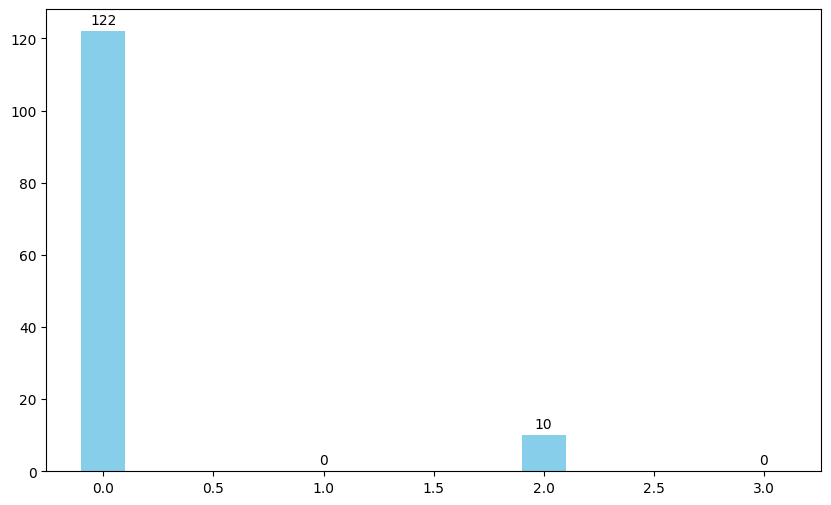

In [50]:
states = results
# Extract data
categories = list(next(iter(states.values())).keys())  # ['00', '01', '10', '11']
bar_width = 0.2  # Width of each bar
x = np.arange(len(categories))  # X positions for bars

# Define colors for each dataset
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']
names = list(states.keys())  # Names of the datasets

# Plot the histogram
plt.figure(figsize=(10, 6))
for i, (name, counts) in enumerate(states.items()):
    counts_values = [counts[category] for category in categories]
    bar_positions = x + i * bar_width
    bars = plt.bar(bar_positions, counts_values, width=bar_width, label=name, color=colors[i])
    
    # Add text annotations above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 1,  # Slightly above the bar
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )


# Add labels, title, and legend
plt.xlabel('States', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of States for Different Bell State Variants', fontsize=14)
plt.xticks(x + bar_width * (len(states) - 1) / 2, categories, fontsize=10)  # Adjust x-ticks
plt.legend(title='Bell States', fontsize=10)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('Results/all.png')
plt.show()

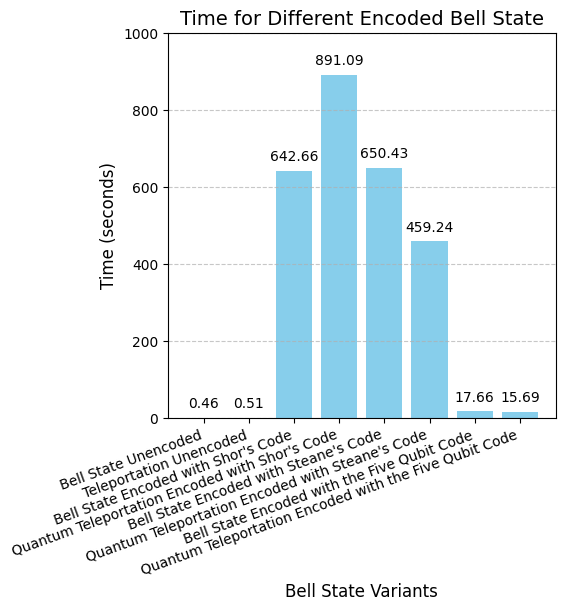

In [55]:
names = [list(item.keys())[0] for item in time]
times = [list(item.values())[0] for item in time]

# Plot the bar chart
plt.figure(figsize=(5, 5))  # Adjust size as needed
bars = plt.bar(names, times, color='skyblue')
plt.ylim(0, 500)  # Set max y-value to 500

# Add value annotations above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + max(times) * 0.02,  # Slightly above the bar
        f'{height:.2f}',  # Format the time with 2 decimal places
        ha='center', 
        va='bottom', 
        fontsize=10
    )

plt.ylim(0, 1000)  # Set max y-value to 500

# Add labels and title
plt.xlabel('Bell State Variants', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time for Different Encoded Bell State', fontsize=14)
plt.xticks(rotation=20, ha='right', fontsize=10)  # Rotate labels for readability

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.savefig('Results/time.png')
plt.show()
plt.close()


### <span style="color: white;"> Quantum Computer

In [7]:
# Convert to an ISA circuit and layout-mapped observables.
circuits = [control_qc_bell, control_qc_tele, shor_qc_bell, shor_qc_tele, steane_qc_bell, steane_qc_tele, fqc_qc_bell, fqc_qc_tele]
pm = generate_preset_pass_manager(backend=qBackend, optimization_level=3)
isa_circuits = [pm.run(circuit) for circuit in circuits]

In [10]:
jobs = []

for i in range(0, len(isa_circuits), 3): # do every 3, can't do all at once because it throws an error
    with Batch(backend=qBackend): # batches can only support 3 jobs if you aren't premium
        sampler = SamplerV2()

        job_1 = sampler.run(pubs=[isa_circuits[i]], shots=2048)
        jobs.append(job_1)
        print(f">>> Job #{i+1}: {job_1.job_id()}")

        if i+1 < len(isa_circuits):
            job_2 = sampler.run(pubs=[isa_circuits[i+1]], shots=2048)
            jobs.append(job_2)
            print(f">>> Job #{i+2}: {job_2.job_id()}")

        if i+2 < len(isa_circuits):
            job_3 = sampler.run(pubs=[isa_circuits[i+2]], shots=2048)
            jobs.append(job_3)
            print(f">>> Job #{i+3}: {job_3.job_id()}")

>>> Job #1: d0mhhsfbxwzg00891hj0
>>> Job #2: d0mhhsz5nwm00085k0b0
>>> Job #3: d0mhht7t9xxg00893rr0
>>> Job #4: d0mhhwzcsg80008fv740


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-17 19:17:09,606: The pending jobs limit has been reached. Waiting for job <RuntimeJob('d0mhhsz5nwm00085k0b0', 'sampler')> to finish before submitting the next one.


>>> Job #5: d0mhj005nwm00085k0c0


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-17 19:17:22,250: The pending jobs limit has been reached. Waiting for job <RuntimeJob('d0mhht7t9xxg00893rr0', 'sampler')> to finish before submitting the next one.


>>> Job #6: d0mhj3rcsg80008fv750


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-17 19:17:43,649: The pending jobs limit has been reached. Waiting for job <RuntimeJob('d0mhhwzcsg80008fv740', 'sampler')> to finish before submitting the next one.


>>> Job #7: d0mhjb1t9xxg00893rwg


qiskit_runtime_service.check_pending_jobs:WARNING:2025-05-17 19:18:05,926: The pending jobs limit has been reached. Waiting for job <RuntimeJob('d0mhj005nwm00085k0c0', 'sampler')> to finish before submitting the next one.


>>> Job #8: d0mhjf15nwm00085k0eg


In [15]:
results = []
time = []

for job in jobs:
    proc_results = {'00': 0, '01': 0, '10': 0, '11': 0}
    #proc_time = {circuits[jobs.index(job)].name: job.metrics()["usage"]["quantum_seconds"]}
    proc_time = {circuits[jobs.index(job)].name: job.usage_estimation['quantum_seconds']}
    for res in job.result()[0].data.measured_output.get_counts():
        proc_results[res[:2]] += job.result()[0].data.measured_output.get_counts()[res]
    results.append(proc_results)
    time.append(proc_time)

print(results, "\n", time)

[{'00': 496, '01': 4, '10': 11, '11': 513}, {'00': 239, '01': 258, '10': 252, '11': 275}, {'00': 304, '01': 231, '10': 244, '11': 245}, {'00': 240, '01': 318, '10': 203, '11': 263}] 
 [{'Bell State Unencoded': 2.153078783185507}, {"Bell State Encoded with Shor's Code": 3.356018261097973}, {"Bell State Encoded with Steane's Code": 3.056052435383051}, {'Bell State Encoded with the Five Qubit Code': 2.890074135689818}]


In [14]:
states = {}
for result in results:
    states[circuits[results.index(result)].name] = result
# Extract data
categories = list(next(iter(states.values())).keys())  # ['00', '01', '10', '11']
bar_width = 0.2  # Width of each bar
x = np.arange(len(categories))  # X positions for bars

# Define colors for each dataset
colors = ['skyblue', 'salmon', 'lightgreen', 'gold']
names = list(states.keys())  # Names of the datasets

# Plot the histogram
plt.figure(figsize=(10, 6))
for i, (name, counts) in enumerate(states.items()):
    counts_values = [counts[category] for category in categories]
    bar_positions = x + i * bar_width
    bars = plt.bar(bar_positions, counts_values, width=bar_width, label=name, color=colors[i])
    
    # Add text annotations above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, 
            height + 1,  # Slightly above the bar
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )


# Add labels, title, and legend
plt.xlabel('States', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Histogram of States for Different Bell State Variants', fontsize=14)
plt.xticks(x + bar_width * (len(states) - 1) / 2, categories, fontsize=10)  # Adjust x-ticks
plt.legend(title='Bell States', fontsize=10)

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('QuantResults/all.png')
plt.show()

NameError: name 'results' is not defined

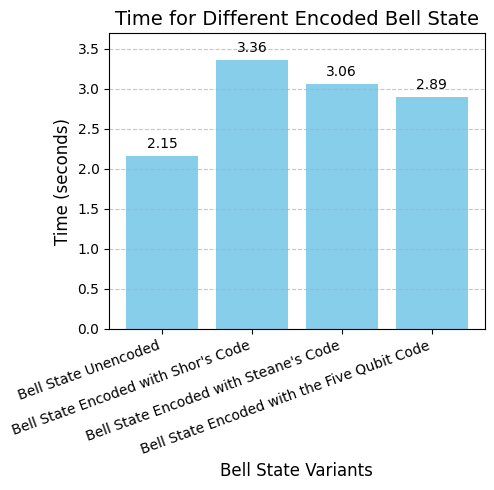

In [17]:
names = [list(item.keys())[0] for item in time]
times = [list(item.values())[0] for item in time]

# Plot the bar chart
plt.figure(figsize=(5, 5))  # Adjust size as needed
bars = plt.bar(names, times, color='skyblue')
plt.ylim(0, max(times)+max(times)/10)  # Set max y-value to 500

# Add value annotations above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        height + max(times) * 0.02,  # Slightly above the bar
        f'{height:.2f}',  # Format the time with 2 decimal places
        ha='center', 
        va='bottom', 
        fontsize=10
    )

# Add labels and title
plt.xlabel('Bell State Variants', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Time for Different Encoded Bell State', fontsize=14)
plt.xticks(rotation=20, ha='right', fontsize=10)  # Rotate labels for readability

# Show gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.savefig('QuantResults/time.png')
plt.show()
plt.close()

## <span style="color: white;">    Processing Results

In [56]:
jobs = [service.job("d0mh2jtcsg80008fv570"), service.job("d0mh2k2b5pe0008c6250"), service.job("d0mh2kjcsg80008fv57g"), service.job("d0mh2ptb5pe0008c625g"), service.job("d0mh2sbcd8w0008sgbvg"), service.job("d0mh2zkcd8w0008sgbx0"), service.job("d0mh39db5pe0008c6290"), service.job("d0mh3cnb5pe0008c62a0")] # replace these with your jobs if you want to run it on your end
circuits = [control_qc_bell, control_qc_tele, shor_qc_bell, shor_qc_tele, steane_qc_bell, steane_qc_tele, fqc_qc_bell, fqc_qc_tele] # get the circuits

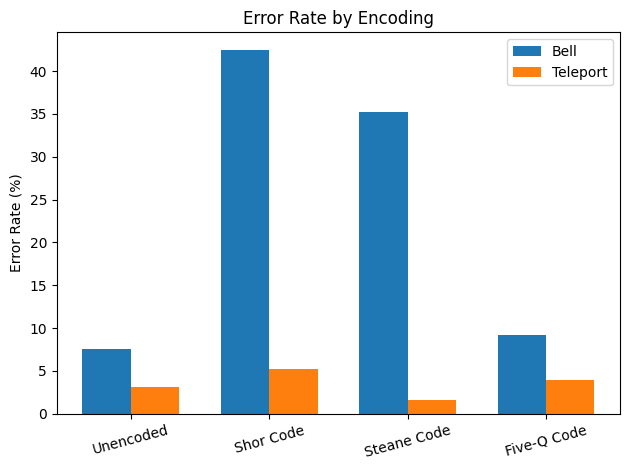

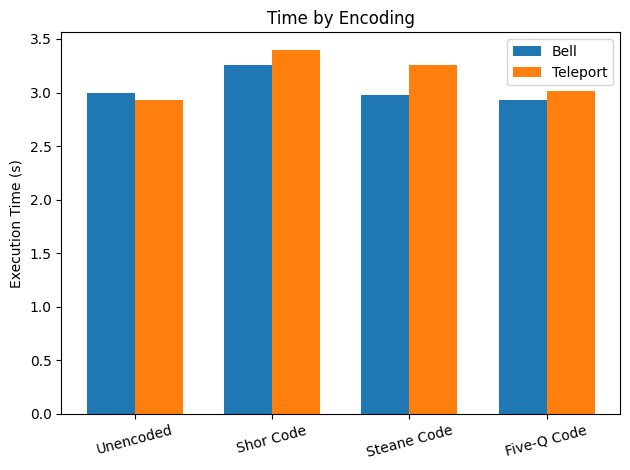

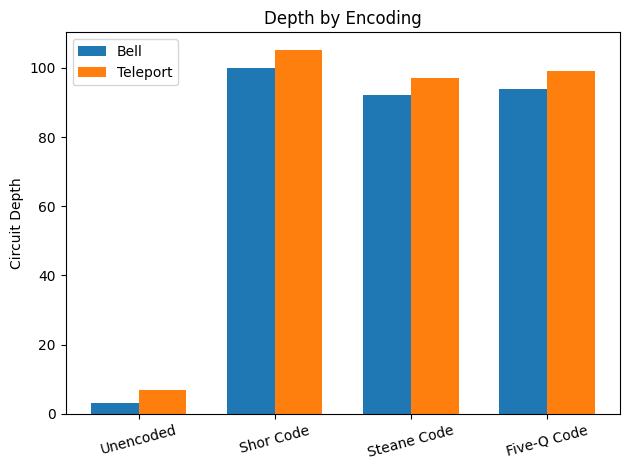

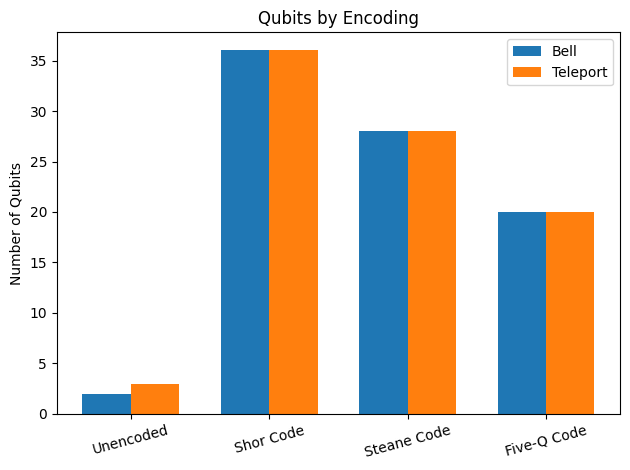

In [70]:
# Group scenarios for plotting and comparison
groups = {
    'Unencoded':     [names[0], names[1]],
    'Shor Code':     [names[2], names[3]],
    'Steane Code':   [names[4], names[5]],
    'Five-Q Code':   [names[6], names[7]],
}

# Plotting utilities
def plot_grouped_bar(metric: dict, ylabel: str, title: str):
    """
    Create a grouped bar chart comparing Bell vs Teleport for each encoding.
    metric: dict mapping circuit name to value
    """
    labels = list(groups.keys())
    bell_vals = [metric[groups[g][0]] for g in labels]
    tel_vals  = [metric[groups[g][1]] for g in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    ax.bar(x - width/2, bell_vals, width, label='Bell')
    ax.bar(x + width/2, tel_vals,  width, label='Teleport')

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=15)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    plt.tight_layout()
    plt.show()

# Generate comparison plots
plot_grouped_bar(errors,      'Error Rate (%)',            'Error Rate by Encoding')
plot_grouped_bar(times,       'Execution Time (s)',        'Time by Encoding')
plot_grouped_bar(depths,      'Circuit Depth',             'Depth by Encoding')
plot_grouped_bar(num_qubits,  'Number of Qubits',          'Qubits by Encoding')

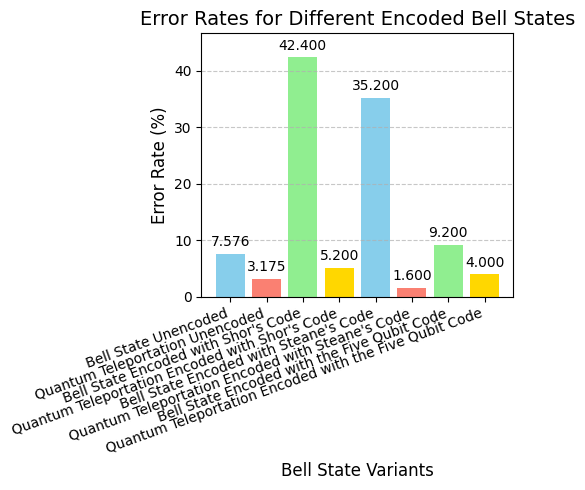

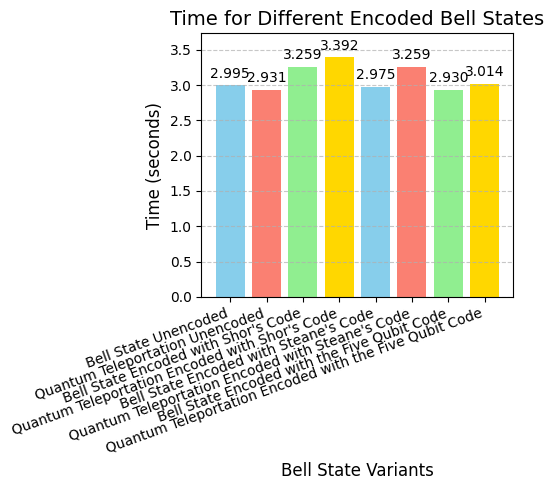

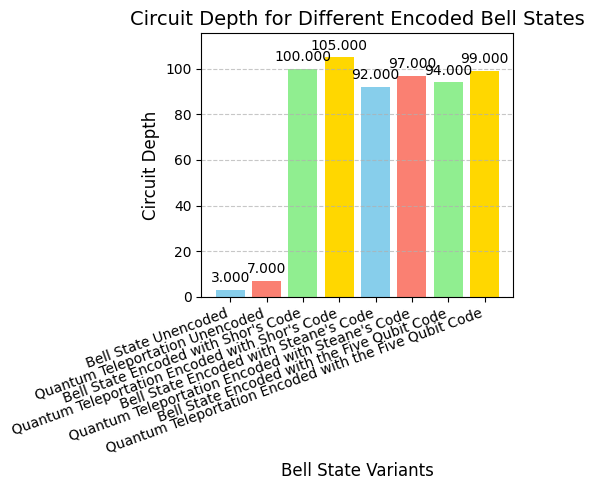

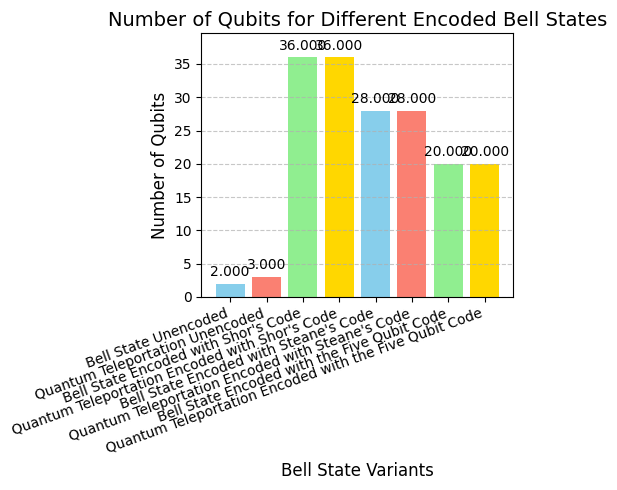

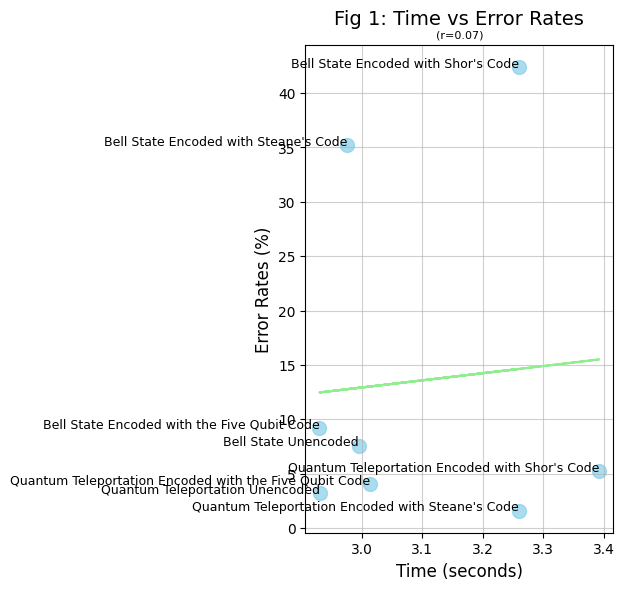

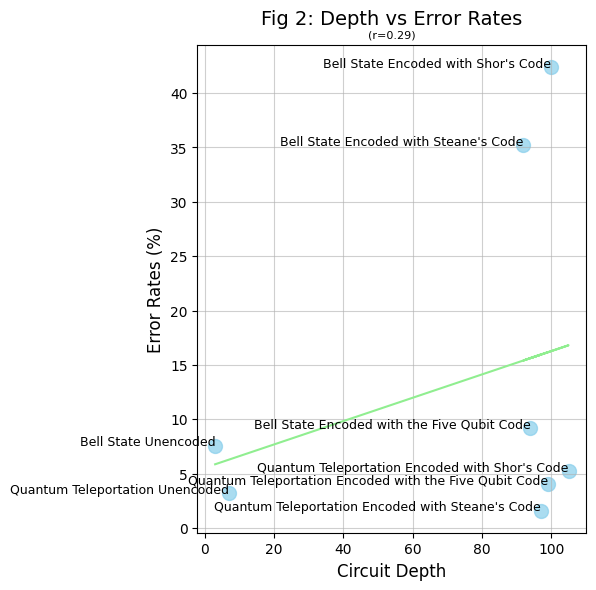

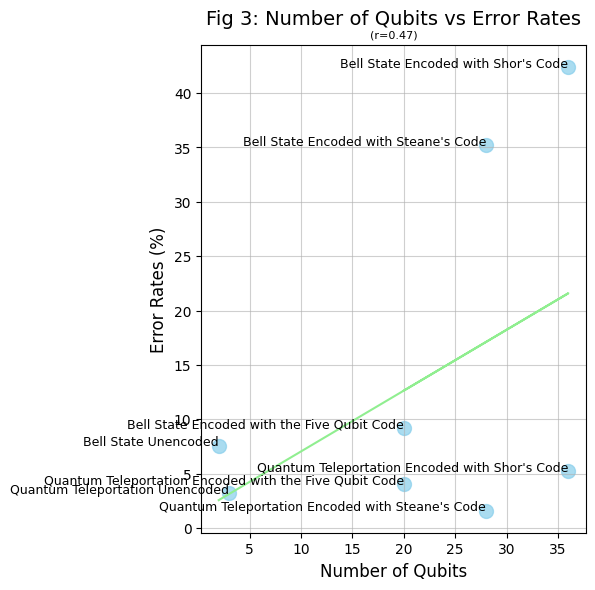

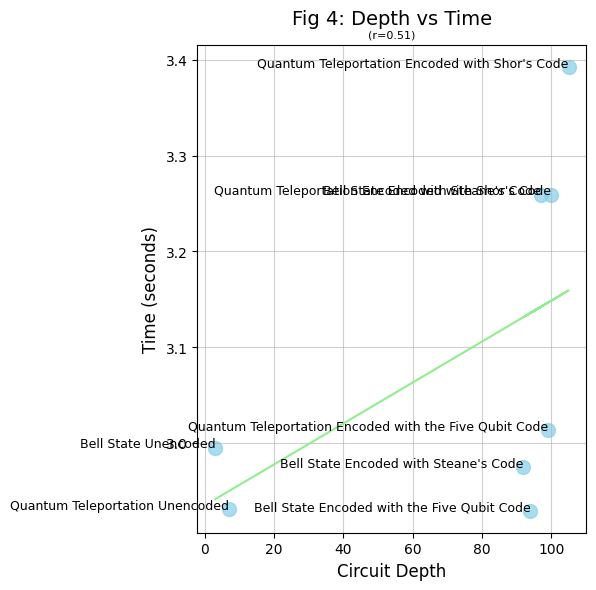

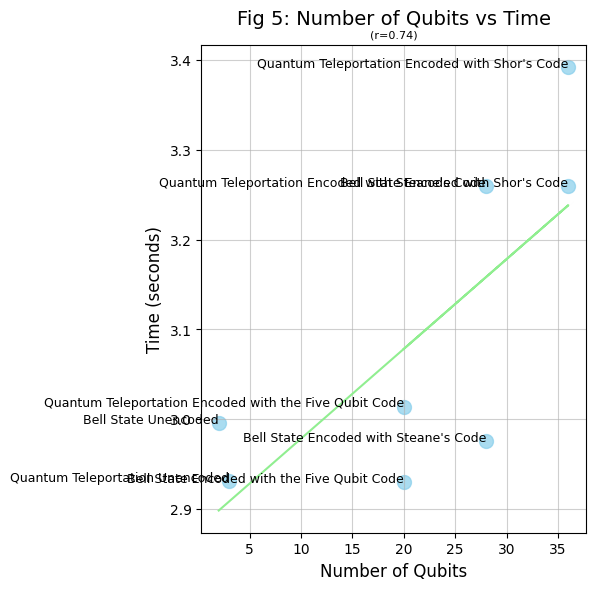

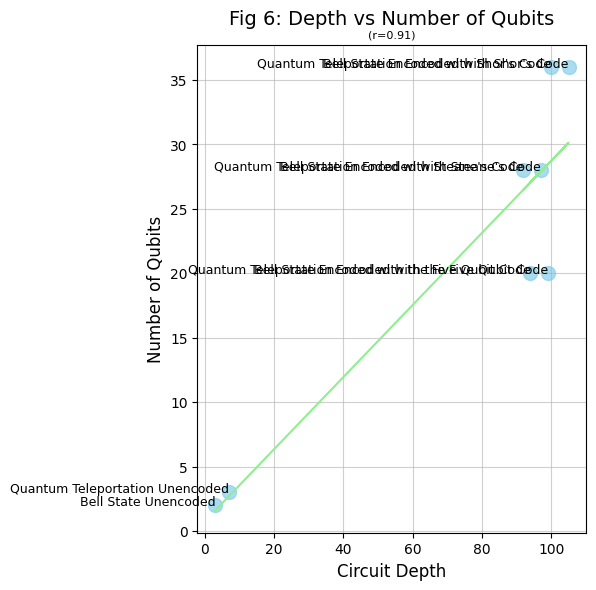

In [68]:
# Extract names and values
def extract_keys_values(dictionary):
    return list(dictionary.keys()), list(dictionary.values())

names, times_values = extract_keys_values(times)
_, error_values = extract_keys_values(errors)
_, depth_values = extract_keys_values(depths)
_, num_qubit_values = extract_keys_values(num_qubits)

def plot_histogram(values, y_name, table_name):
    # Plot histogram for error rates
    plt.figure(figsize=(5, 5))
    bars = plt.bar(names, values, color = ['skyblue', 'salmon', 'lightgreen', 'gold'])
    plt.ylim(0, max(values) + max(values) / 10)
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + max(values) * 0.02,
            f'{height:.3f}',
            ha='center',
            va='bottom',
            fontsize=10
        )
    plt.xlabel('Bell State Variants', fontsize=12)
    plt.ylabel(y_name, fontsize=12)
    plt.title(table_name, fontsize=14)
    plt.xticks(rotation=20, ha='right', fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f"QuantResults/{table_name}.png")
    plt.show()
    plt.close()


plot_histogram(error_values, 'Error Rate (%)', 'Error Rates for Different Encoded Bell States')

plot_histogram(times_values, 'Time (seconds)', 'Time for Different Encoded Bell States')

plot_histogram(depth_values, 'Circuit Depth', 'Circuit Depth for Different Encoded Bell States')

plot_histogram(num_qubit_values, 'Number of Qubits', 'Number of Qubits for Different Encoded Bell States')

# Plot scatter plots
relationships = [
    (times_values, error_values, 'Time (seconds)', 'Error Rates (%)', 'Fig 1: Time vs Error Rates'),
    (depth_values, error_values, 'Circuit Depth', 'Error Rates (%)',  'Fig 2: Depth vs Error Rates'),
    (num_qubit_values, error_values, 'Number of Qubits', 'Error Rates (%)', 'Fig 3: Number of Qubits vs Error Rates'),
    (depth_values, times_values, 'Circuit Depth', 'Time (seconds)', 'Fig 4: Depth vs Time'),
    (num_qubit_values, times_values, 'Number of Qubits', 'Time (seconds)', 'Fig 5: Number of Qubits vs Time'),
    (depth_values, num_qubit_values, 'Circuit Depth', 'Number of Qubits', 'Fig 6: Depth vs Number of Qubits')
]

for x_values, y_values, xlabel, ylabel, title in relationships:
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    # Line of regression (y = mx + b)
    regression_line = slope * np.array(x_values) + intercept
    
    plt.figure(figsize=(6, 6))
    
    plt.scatter(x_values, y_values, color='skyblue', s=100, alpha=0.7)
    # Plot the regression line
    plt.plot(x_values, regression_line, color='lightgreen')
    for i, name in enumerate(names):
        plt.text(x_values[i], y_values[i], name, fontsize=9, ha='right')
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(title, fontsize=14, y= 1.025)
    
    plt.text(x=.5, y=1.02, s=f'(r={r_value:.2f})', ha='center', va='center', fontsize=8, transform=plt.gca().transAxes)
    
    plt.tight_layout()
    plt.grid(alpha=0.6)
    plt.savefig(f"QuantResults/{title}.png")
    plt.show()
    plt.close()